# 1.1.1 Пример
Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

In [13]:
import numpy as np
x= np.array([0,1,2,3])
y= np.array([-1,0.2,0.9,2.1])

A= np.vstack([x,np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [14]:
m,c=np.linalg.lstsq(A,y,rcond=None)[0]
print(m,c)

0.9999999999999999 -0.9499999999999997


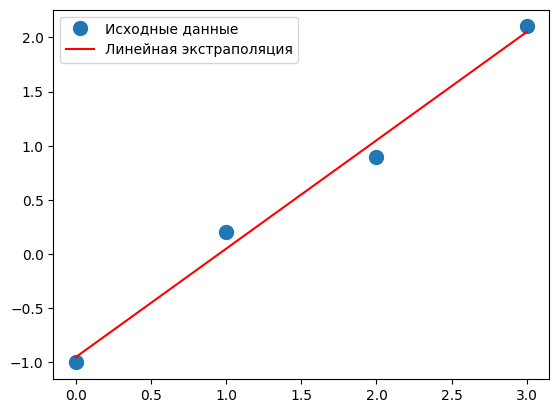

In [15]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные', markersize=10)
plt.plot(x,m*x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

# 1.1.2 Пример
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты полинома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [16]:
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-5,5,11)
y = x**2 + delta * (rand(11) - 0.5)
x += delta*(rand(11)-0.5)

x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

In [17]:
x=fromfile('x_data.txt',float,sep='\n')
y=fromfile('y_data.txt',float,sep='\n')

print(x)
print(y)

[-4.83906253 -3.76783046 -3.25975981 -2.34328524 -1.12752495  0.20924652
  1.029249    1.58783158  3.0034739   3.88225805  5.07173187]
[25.07695411 16.06114241  8.78266994  3.53544192  1.13104484  0.21014756
  0.81841844  3.97613343  9.07623087 15.69292264 24.71908452]


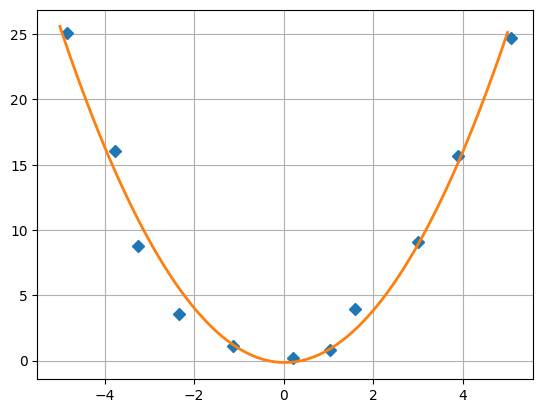

In [18]:
m=vstack((x**2,x,ones(11))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]

x_prec=linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.savefig('парабола.png')

# 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

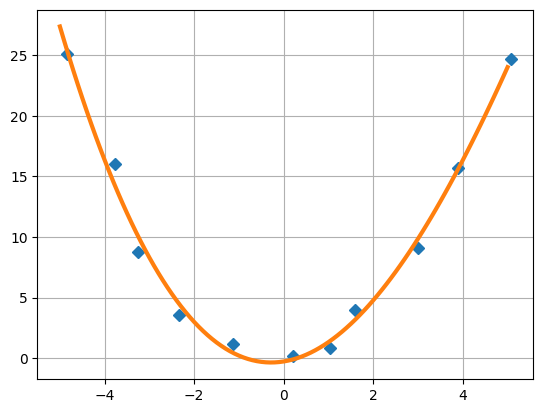

In [19]:
m=vstack((x**3,x**2,x,ones(11))).T
s=np.linalg.lstsq(m,y,rcond=None)[0]
x_prec=linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec, s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

# Задание
Представьте собственные данные и постройте экcтраполяцию полиномами
первой, второй и третьей степени.

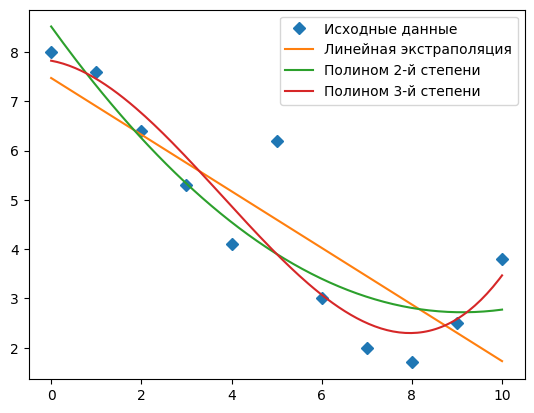

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x= np.array([0,1,2,3,4,5,6,7,8,9,10])
y= np.array([8.0, 7.6, 6.4, 5.3, 4.1, 6.2, 3, 2, 1.7, 2.5, 3.8])
x_prec=linspace(0,10,150)

plt.plot(x,y,'D',label='Исходные данные')

m = np.vstack([x,np.ones(len(x))]).T
s = np.linalg.lstsq(m,y,rcond=None)[0]
plt.plot(x_prec, s[0] * x_prec + s[1], '-', label='Линейная экстраполяция')

m = np.vstack((x**2, x, ones(len(x)))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', label='Полином 2-й степени')

m = np.vstack((x**3, x**2, x, ones(len(x)))).T
s = np.linalg.lstsq(m,y,rcond=None)[0]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', label='Полином 3-й степени')

plt.legend()
plt.show()
plt.savefig('task1.png')

# 1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1 𝑒𝑥𝑝(−𝑏2𝑥^2)

In [21]:
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*np.exp(-b2*x**2)
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))

In [22]:
from scipy.optimize import curve_fit
beta_opt,beta_cov=curve_fit(f,xdata,ydata)
beta_opt

array([0.24320677, 0.77846956, 0.4845306 ])

In [23]:
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

0.00024140841930275845
0.13015873795687627


<function matplotlib.pyplot.show(close=None, block=None)>

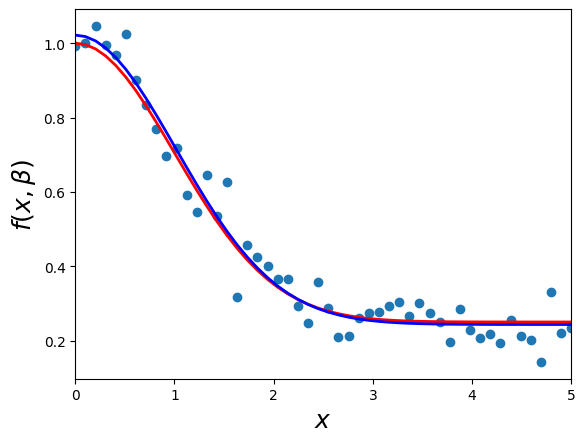

In [24]:
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize=18)
plt.show

# 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1 𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1 𝑥 + 𝑏_2 𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏_0 + 𝑏_1^𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏_0 𝑥^(𝑏_1)


In [25]:
import numpy as np
#1
beta=(0.25,0.75)
def f(x,b0,b1):
    return b0+b1*x
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

[0.28080364 0.73843889]
0.00011774600552425231
0.1035352790031104


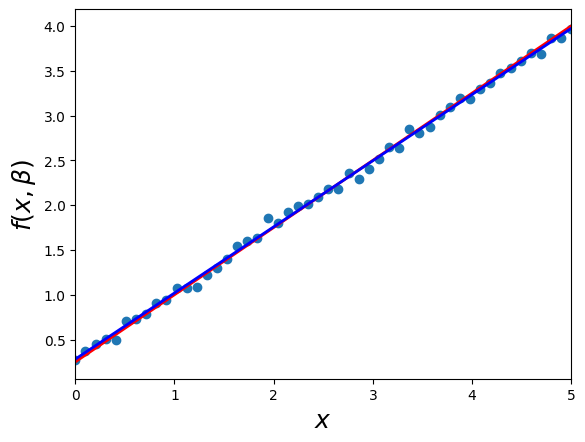

In [26]:
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

In [27]:
#2
beta=(0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0+b1*x+b2*x*x
xdata=np.linspace(0,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

[0.26286614 0.76424189 0.49683997]
0.00010396609854147377
0.08669684204971412


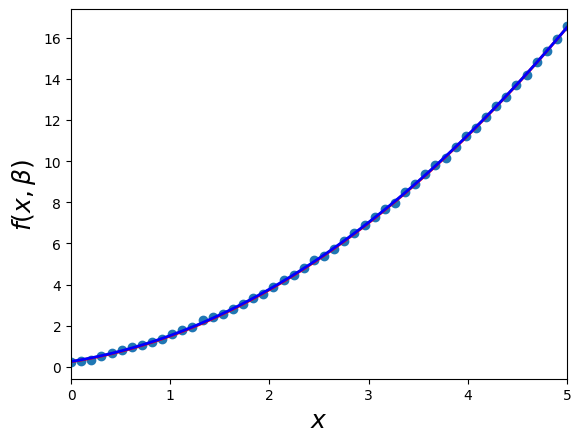

In [28]:
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

In [29]:
#3
beta=(1,2)
def f(x,b0,b1):
    return b0+b1*np.log(x)
xdata=np.linspace(1,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

[1.012984   1.99287018]
4.325754244553223e-05
0.10003052730630724


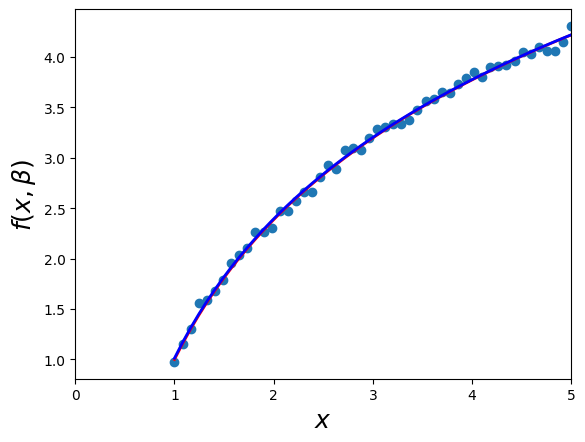

In [30]:
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

In [31]:
#4
beta=(1,2)
def f(x,b0,b1):
    return b0*x**b1
xdata=np.linspace(1,5,50)
y=f(xdata,*beta)
ydata=y+0.05*np.random.randn(len(xdata))
beta_opt,beta_cov=curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev=sum(beta_cov[0])
print(lin_dev)
residuals=ydata-f(xdata,*beta_opt)
fres=sum(residuals**2)
print(fres)

[1.00115516 1.99908968]
4.672748569713833e-06
0.11069881869489015


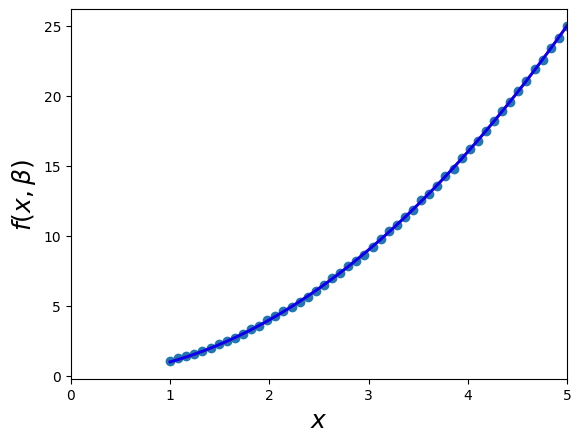

In [32]:
fig,ax=plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize=18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize=18)
plt.show()

# Задание
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[0.24999997 0.75000013]
-1.570732097668411e-12
0.11456733673848254


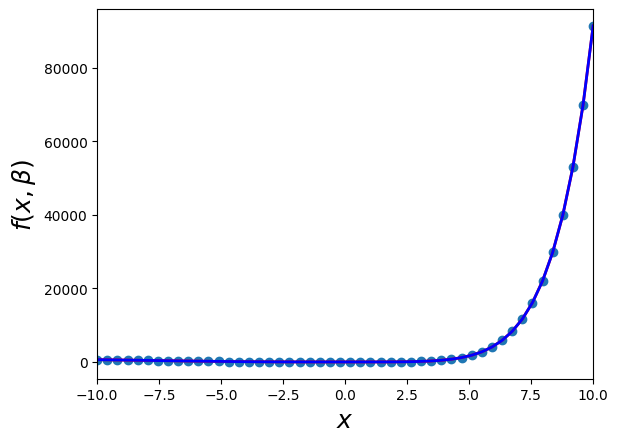

In [33]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

beta = (.25, .75)
def myF(x, b0, b1):
    return np.exp(b0 * x) * b1 * (x**4)
xdata = np.linspace(-10, 10, 50)
y = myF(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(myF, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - myF(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, myF(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-10, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

# 1.2.1 Пример

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
my_dict={'Учебное время':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
                          2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
        'Оценка':[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset=pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [36]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


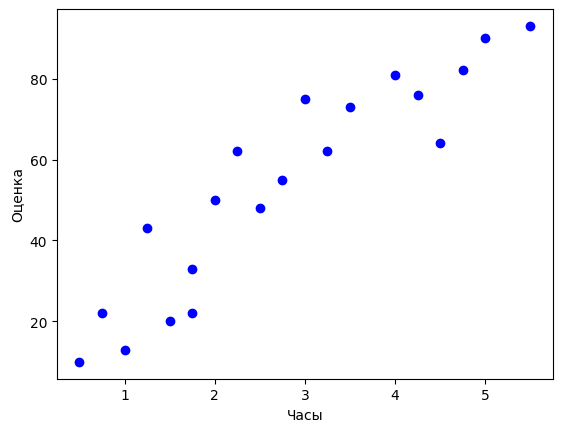

In [37]:
plt.scatter(dataset['Учебное время'],dataset['Оценка'],color='b',label="данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [38]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


In [41]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


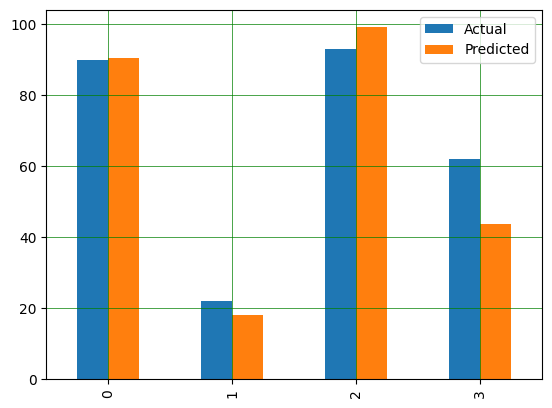

In [42]:
df.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle='-',linewidth='0.5',color='green')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

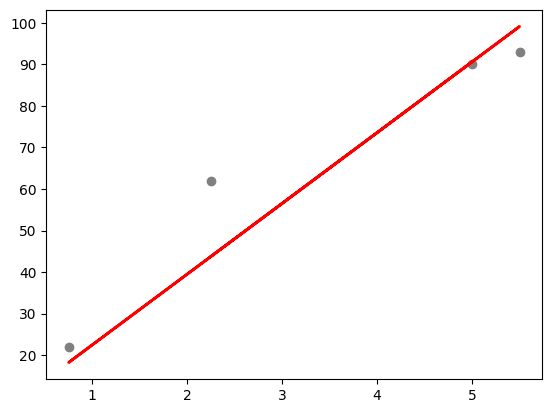

In [43]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show

# Задание
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

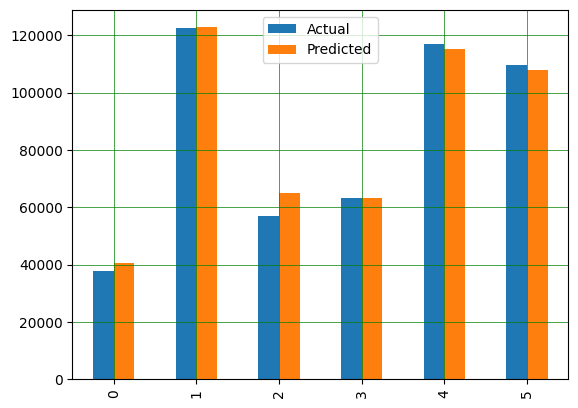

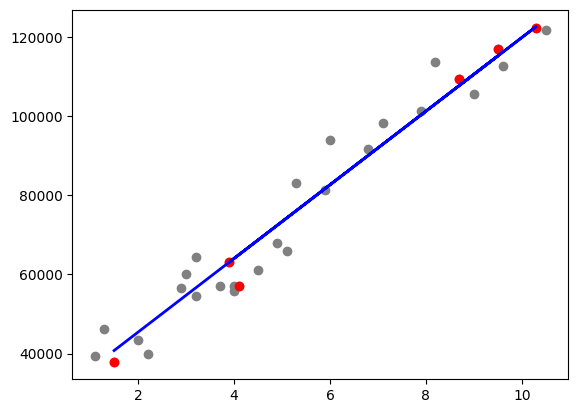

In [45]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='gray', label='Зарплата')
plt.scatter(X_test, Y_test, color='r')
plt.plot(X_test, y_pred, color='b', linewidth=2)
plt.show()

# 1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [51]:
import numpy as np

y=[1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
   [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
   [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X=np.transpose(X)
X=np.c_[X,np.ones(X.shape[0])]
linreg=np.linalg.lstsq(X,y,rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


# 1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
y=[1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X=[[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
   [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
   [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y=np.array(y)
new_y=new_y.transpose()
df1=pd.DataFrame(new_y)
new_X=np.array(X)
new_X=new_X.transpose()
df2=pd.DataFrame(new_X)
df1=df1.rename(columns={0:'y'},inplace=False)
df2=df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace=False)

frames=[df1,df2]
dataset=pd.concat([df1,df2],axis=1,join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [54]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [55]:
X=dataset[['x1','x2','x3']]
y=dataset['y']
X

,x1,x2,x3
0,0,4,4
1,2,1,1
2,4,2,2
3,1,3,5
4,5,4,6
5,4,5,7
6,5,6,8
7,9,7,9
8,9,5,7
9,9,8,8


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=False)

In [57]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [59]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [60]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 1.3272699242343076


# Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [86]:
# data = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv', names=["Petrol_tax","Average_income","Paved_Highways","Population_Driver_licence(%)","Petrol_Consumption"])
data = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")
print(data.head())

x=data.drop("Petrol_Consumption", axis=1)
y=data["Petrol_Consumption"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=69)

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

X_test = X_test.iloc[0]

prediction = regressor.predict(X_test.values.reshape(1, -1)) # We should have renamed columns, but it is what it is.

print("Predicted petrol consumption:", prediction[0])
print("Actual petrol consumption:", Y_test.iloc[0])
print("Coefficients:", regressor.coef_)

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
Predicted petrol consumption: 527.8037152657068
Actual petrol consumption: 541
Coefficients: [-0.00041793 -0.00074467 -0.00059715 -0.00066004 -0.00103971 -0.00105046
  0.001716   -0.00078293  0.00108216  0.00104679  0.00040561]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Задание*
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

Полином 1 степени: y = -0.43x + 4.38
Полином 2 степени: y = -7.14x^2 + 6.71x + 3.43


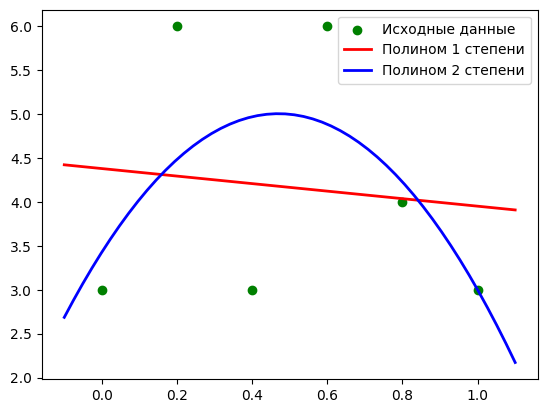

In [113]:
# Вариант №1
x=np.array([0.0,0.2,0.4,0.6,0.8,1.0])
y=np.array([3.0,6.0,3.0,6.0,4.0,3.0])

def x1(x, b0, b1):
    return b0 + b1*x

def x2(x, b0, b1, b2):
    return b0 + b1*x + b2*x**2

beta_opt_x1, beta_cov_x1 = sp.optimize.curve_fit(x1, x, y)
beta_opt_x2, beta_cov_x2 = sp.optimize.curve_fit(x2, x, y)

print(f'Полином 1 степени: y = {beta_opt_x1[1]:.2f}x + {beta_opt_x1[0]:.2f}')
print(f'Полином 2 степени: y = {beta_opt_x2[2]:.2f}x^2 + {beta_opt_x2[1]:.2f}x + {beta_opt_x2[0]:.2f}')

plt.scatter(x, y, color='green', label='Исходные данные')

x = np.linspace(-0.1, 1.1, 50)
y = x1(x, *beta_opt_x1)
plt.plot(x, y, 'r', lw=2, label='Полином 1 степени')

y = x2(x, *beta_opt_x2)
plt.plot(x, y, 'b', lw=2, label='Полином 2 степени')

plt.legend()
plt.show()